# Data Augmentation

We will work with Fashion-MNIST.

Design of a Convolutional Neural Network (CNN) that is trained to classify the digits of the Fashion-MNIST dataset by loading the images with an ImageDataGenerator.

First, we train the network with the original undisturbed images, and evaluate them by independently adding rotation, translation, and brightness disturbances, creating an ImageDataGenerator for each disturbance. We report the validation accuracy metrics for each of the assessments.

Second, we retrain the model from scratch, now making use of the training data with perturbations, and we evaluate it again to verify that the model's robustness is now greater.

In [ ]:
# We import the necessary libraries.

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.keras.layers     import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.utils      import to_categorical
from tensorflow.keras            import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# We import the dataset from the Keras datasets module.
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# We use Sklearn's data splitter to train/test
from sklearn.model_selection     import train_test_split

# Partition train/test split to monitor overfitting.
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.3)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D())

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=10, activation='softmax')) 

# ---- MODEL CONFIGURATION ---- #
model.compile(optimizer=SGD(learning_rate=0.5), 
              loss="mse",
              metrics=["acc"])

# ---- EARLYSTOPPING ---- #
early_stop = EarlyStopping(monitor="val_acc", patience=3)


# ---- MODEL TRAINING ---- #
model.fit(X_train, Y_train,
                 validation_data=(X_test, Y_test),
                 batch_size=8, callbacks=[early_stop], epochs=20)

Epoch 1/20
5250/5250 [==============================] - 60s 11ms/step - loss: 27.7564 - acc: 0.1002 - val_loss: 27.5684 - val_acc: 0.0996
Epoch 2/20
5250/5250 [==============================] - 52s 10ms/step - loss: 27.7564 - acc: 0.1002 - val_loss: 27.5684 - val_acc: 0.0996
Epoch 3/20
5250/5250 [==============================] - 55s 10ms/step - loss: 27.7564 - acc: 0.1002 - val_loss: 27.5684 - val_acc: 0.0996
Epoch 4/20
5250/5250 [==============================] - 54s 10ms/step - loss: nan - acc: 0.1017 - val_loss: nan - val_acc: 0.1014
Epoch 5/20
5250/5250 [==============================] - 54s 10ms/step - loss: nan - acc: 0.0994 - val_loss: nan - val_acc: 0.1014
Epoch 6/20
5250/5250 [==============================] - 53s 10ms/step - loss: nan - acc: 0.0994 - val_loss: nan - val_acc: 0.1014
Epoch 7/20
5250/5250 [==============================] - 54s 10ms/step - loss: nan - acc: 0.0994 - val_loss: nan - val_acc: 0.1014


In [ ]:
# translation generator
shift_test_gen = ImageDataGenerator(width_shift_range =0.25,
                                    height_shift_range=0.25).flow(X_test.reshape(-1, 28, 28, 1), Y_test)

# Rotation generator
rotat_test_gen = ImageDataGenerator(rotation_range=90).flow(X_test.reshape(-1, 28, 28, 1), Y_test)

# Glow generator
bright_test_gen = ImageDataGenerator(brightness_range=(0.1,0.40)).flow(X_test.reshape(-1, 28, 28, 1), Y_test)

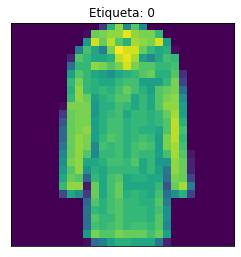

In [ ]:
# I get images from the generator.
batchX, batchY = next(bright_test_gen)

# We display the images
idx = 2
plt.matshow(batchX[idx, :, :, 0])
plt.xticks([])
plt.yticks([])
plt.title("Etiqueta: " + str(np.argmax(batchY[idx])))
plt.show()


In [ ]:
print('Traslación:', model.evaluate(shift_test_gen))
print('--------------')
print('Rotación:',   model.evaluate(rotat_test_gen))
print('--------------')
print('Brillo 10-40%:',  model.evaluate(bright_test_gen))

563/563 [==============================] - 11s 19ms/step - loss: nan - acc: 0.1014
Traslación: [nan, 0.10138888657093048]
--------------
563/563 [==============================] - 8s 15ms/step - loss: nan - acc: 0.1014
Rotación: [nan, 0.10138888657093048]
--------------
563/563 [==============================] - 8s 14ms/step - loss: nan - acc: 0.1014
Brillo 10-40%: [nan, 0.10138888657093048]


In [ ]:
# Generator of training images with perturbations.
augmentated_train_data = ImageDataGenerator(rescale=1./255,
                                            width_shift_range =0.15,
                                            height_shift_range=0.15,
                                            rotation_range=50,
                                            brightness_range=(0.1,0.4)).flow(X_train.reshape(-1, 28, 28, 1), to_categorical(Y_train))


# Generator of test images with disturbances.
augmentated_test_data = ImageDataGenerator(rescale=1./255,
                                           width_shift_range =0.15,
                                           height_shift_range=0.15,
                                           rotation_range=50,
                                           brightness_range=(0.1,0.4)).flow(X_test.reshape(-1, 28, 28, 1), to_categorical(Y_test))

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

# We compile and configure the model.
model.compile(optimizer=SGD(learning_rate=0.1),
              loss="mse",
              metrics=["acc"])

# We train the model.
model.fit(augmentated_train_data, validation_data=augmentated_test_data, callbacks=[early_stop], epochs=50)

Epoch 1/50
1313/1313 [==============================] - 60s 45ms/step - loss: nan - acc: 0.0994 - val_loss: nan - val_acc: 0.1014
Epoch 2/50
1313/1313 [==============================] - 67s 51ms/step - loss: nan - acc: 0.0994 - val_loss: nan - val_acc: 0.1014
Epoch 3/50
1313/1313 [==============================] - 68s 51ms/step - loss: nan - acc: 0.0994 - val_loss: nan - val_acc: 0.1014
Epoch 4/50
1313/1313 [==============================] - 67s 51ms/step - loss: nan - acc: 0.0994 - val_loss: nan - val_acc: 0.1014
